# Customer Churn

## *By: Alexandria Ransom*

* Link to Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
* Y target variable: Churn column 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("C:\\Users\\Alexandria\\Downloads\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 1.) Doing Mini EDA to get an understanding of data and our target column

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<AxesSubplot:xlabel='count', ylabel='Churn'>

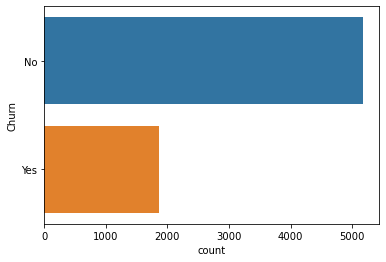

In [5]:
sns.countplot(y ='Churn', data = df)

In [6]:
print(sorted(Counter(df['Churn']).items()))

[('No', 5174), ('Yes', 1869)]


In [7]:
#Data looks imbalanced. The metric we are using is accuracy, so will try oversampling the data to produce positive training results
#Resampling: Will be resampling below for splitting the data into training and test set

In [8]:
yes_churn = df[df['Churn']=='yes']
no_churn = df[df['Churn']== 'no']

In [9]:
print(yes_churn.shape)
print(no_churn.shape)

(0, 21)
(0, 21)


In [10]:
X = df 
y = df['Churn']

In [11]:
ros = RandomOverSampler(random_state = 0)
X_res, y_res = ros.fit_resample(X,y)
print(sorted(Counter(y_res).items()), y_res.shape)

[('No', 5174), ('Yes', 5174)] (10348,)


C:\Users\Alexandria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


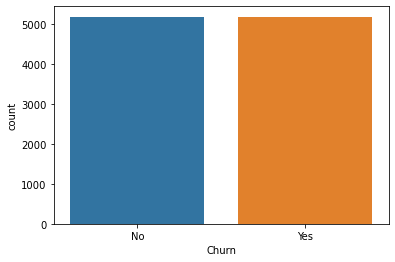

In [12]:
sns.countplot(y_res);

In [13]:
# we can visually see the data is well balanced 

### 2.) Splitting the data into a train and test set 
### 3.) Not touching the test set until step 8

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, shuffle = True, random_state = 222, stratify = y_res)

In [15]:
X_train.shape

(8278, 21)

In [16]:
y_train.shape

(8278,)

In [17]:
### 4.) Do pre=processing like one-hot encoding 

In [18]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10197,6615-ZGEDR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.7,19.7,Yes
4746,0637-KVDLV,Male,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.5,162.45,Yes
7145,9894-EZEWG,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.3,74.3,Yes
7044,2153-MREFK,Female,0,Yes,No,37,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Electronic check,99.2,3754.6,Yes
8316,6022-UGGSO,Female,1,No,No,32,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.4,2276.95,Yes


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 10197 to 170
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        8278 non-null   object 
 1   gender            8278 non-null   object 
 2   SeniorCitizen     8278 non-null   int64  
 3   Partner           8278 non-null   object 
 4   Dependents        8278 non-null   object 
 5   tenure            8278 non-null   int64  
 6   PhoneService      8278 non-null   object 
 7   MultipleLines     8278 non-null   object 
 8   InternetService   8278 non-null   object 
 9   OnlineSecurity    8278 non-null   object 
 10  OnlineBackup      8278 non-null   object 
 11  DeviceProtection  8278 non-null   object 
 12  TechSupport       8278 non-null   object 
 13  StreamingTV       8278 non-null   object 
 14  StreamingMovies   8278 non-null   object 
 15  Contract          8278 non-null   object 
 16  PaperlessBilling  8278 non-null   objec

In [20]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
X_train['TotalCharges']

10197       19.7
4746      162.45
7145        74.3
7044      3754.6
8316     2276.95
          ...   
5836       124.4
2069        95.6
6732     2259.35
5822        2419
170      3539.25
Name: TotalCharges, Length: 8278, dtype: object

 ### 4.)  Do pre-processing like fixing data types, missing value imputation, one-hot-encoding

In [22]:
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')

In [23]:
X_train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(0)

In [25]:
X_train['TotalCharges'].isnull().sum()

0

In [26]:
len(X_train['customerID'].unique())

5922

In [27]:
X_train.drop('customerID', axis="columns", inplace=True)

In [28]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10197,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.7,19.70,Yes
4746,Male,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.5,162.45,Yes
7145,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.3,74.30,Yes
7044,Female,0,Yes,No,37,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,One year,Yes,Electronic check,99.2,3754.60,Yes
8316,Female,1,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.4,2276.95,Yes


In [29]:
X_train.columns =X_train.columns.str.capitalize()

In [30]:
X_train.head(3)

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
10197,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.7,19.70,Yes
4746,Male,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.5,162.45,Yes
7145,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.3,74.30,Yes


#### 5.) Separate out the target (y) variable from the train set to create a train_X and train_y.- completed already

In [31]:
#separate categorical columns and numerical columns
cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = X_train.columns[X_train.dtypes != object]

In [32]:
cat_cols

Index(['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines',
       'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection',
       'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract',
       'Paperlessbilling', 'Paymentmethod', 'Churn'],
      dtype='object')

In [33]:
num_cols

Index(['Seniorcitizen', 'Tenure', 'Monthlycharges', 'Totalcharges'], dtype='object')

In [34]:
#one hot encode
ohe = OneHotEncoder() #only for string data

In [35]:
ohe.fit(X_train[cat_cols]) #1.) fit 2.) transform 

OneHotEncoder()

In [36]:
cat_df = pd.DataFrame(ohe.transform(X_train[cat_cols]).toarray(), columns=ohe.get_feature_names_out(), index=X_train.index)
#transforming our model , training data cat columns to an array, getting feature names out of model, index preserves random shuffle earlier this is only fot cat data 

In [37]:
cat_df.head()

,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phoneservice_No,Phoneservice_Yes,Multiplelines_No,Multiplelines_No phone service,...,Contract_One year,Contract_Two year,Paperlessbilling_No,Paperlessbilling_Yes,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Churn_No,Churn_Yes
10197,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4746,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7145,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7044,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8316,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
num_df = X_train[num_cols]

In [39]:
#merge num and cat df
X_train = pd.merge(num_df, cat_df, left_index=True, right_index=True) #merge the two sets 

In [40]:
X_train.head()

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,Paperlessbilling_No,Paperlessbilling_Yes,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Churn_No,Churn_Yes
10197,0,1,19.7,19.70,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4746,0,2,76.5,162.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7145,0,1,74.3,74.30,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7044,0,37,99.2,3754.60,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8316,1,32,74.4,2276.95,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
y_train.head()

10197    Yes
4746     Yes
7145     Yes
7044     Yes
8316     Yes
Name: Churn, dtype: object

In [42]:
y_train.shape

(8278,)

In [43]:
# cannot leave target variable as a categorical variable, need to convert it to a number.
# will do label encoding to convert Yes to 1 and No to 0.
le = LabelEncoder()

In [44]:
le.fit(y_train)#ravel is to get rid of warning 

LabelEncoder()

In [45]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
le.transform(y_train)

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
pd.Series(le.transform(y_train))

0       1
1       1
2       1
3       1
4       1
       ..
8273    0
8274    1
8275    0
8276    0
8277    0
Length: 8278, dtype: int32

In [95]:
y_train #assign 1 and 0's to these values 

10197    Yes
4746     Yes
7145     Yes
7044     Yes
8316     Yes
        ... 
5836      No
2069     Yes
6732      No
5822      No
170       No
Name: Churn, Length: 8278, dtype: object

In [49]:
#cross-validate machine learning models
models = {
          "KNN K-nearest neighbors": KNeighborsClassifier(),
          "Support Vector Machine": SVC(random_state=101), #random state ensures you will select same features all the time #gets trained the same way every time 
          "DecisionTreeClassifier": DecisionTreeClassifier(random_state=101),
          "RandomForestClassifier": RandomForestClassifier(random_state=101),
          "Logistic Regression": LogisticRegression(), 
          "GradientBoostingClassifier":  GradientBoostingClassifier(random_state=101)
         }

#### 6.) Do cross-validation on the train set to get the best performing model.

In [50]:
def crossValidate(models, X_train, y_train, cv, scoring):
    folds = KFold(n_splits=cv, shuffle=True, random_state=101)
    scoresDf = pd.DataFrame(columns=["modelName", "score"])
    for modelName, model in models.items():
        scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=folds, scoring=scoring)
        avg_score = np.mean(scores)
        scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
    scoresDf.sort_values(by='score', ascending=False, inplace=True, ignore_index=True)
    return scoresDf


In [51]:
#choosing evaluation metric of f1 score
scoresDf = crossValidate(models, X_train, y_train, cv=5, scoring='accuracy') #discuss scoring with project manager

C:\Users\Alexandria\AppData\Local\Temp\ipykernel_9644\4142546895.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
C:\Users\Alexandria\AppData\Local\Temp\ipykernel_9644\4142546895.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
C:\Users\Alexandria\AppData\Local\Temp\ipykernel_9644\4142546895.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
C:\Users\Alexandria\AppData\Local\Temp\ipykernel_9644\4142546895.py:7: FutureWarning: The frame.append method

In [52]:
scoresDf

,modelName,score
0,DecisionTreeClassifier,1.0
1,RandomForestClassifier,1.0
2,Logistic Regression,1.0
3,GradientBoostingClassifier,1.0
4,KNN K-nearest neighbors,0.766974
5,Support Vector Machine,0.644479


In [53]:
#DecisionTreeClassifier takes the win, along with RandomForestClassifier, Logistic Regression, and GradientBoostingClassifier. 
#I decided to go with a DecisionTreeClassifier because they are non linear classifiersand does not require the data to be divided 
#into seperate parts like Logistic Regression (even tho it recieved 100 %) Just a personal preference Logistic Regression is also 
#an easy algothrim to interpert and easy to explain stakeholders, for visual purposes we be picking DecisionTreeClassifier

In [54]:
#no need to hyperparameter tune with models at 100 %, but will for demo purposes :) 

#### 7.) No need to hyperparameter tune with models at 100 % accuracy, but will for demo purposes :) Do hyper-parameter tuning on the best model to improve score even more.

In [55]:
folds = KFold(n_splits=5, shuffle=True, random_state=101) #always be the same change cv to exact 

In [56]:
param_grid = [{'criterion':['gini','entropy']}, # l1 lasso l2 ridge, create regularization penalty space
              {'max_depth':[ range(1,10)]},
               {'min_samples_split': [range(1,10)]},
               {'min_samples_leaf': [range(1,5)]}] # Create regularization hyperparameter space

In [57]:
randomsearch_model = RandomizedSearchCV(estimator = DecisionTreeClassifier(),  
                           param_distributions= param_grid,
                           scoring = 'f1',
                           cv = folds,
                           verbose=0)


In [58]:
random_search = randomsearch_model.fit(X_train, y_train)

C:\Users\Alexandria\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Alexandria\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alexandria\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Alexandria\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Alexandria\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Alexandria\Anaconda3\l

In [59]:
random_search.best_estimator_ 

DecisionTreeClassifier()

In [60]:
print('Best Criterion:', random_search.best_estimator_.get_params()['criterion'])

Best Criterion: gini


In [61]:
print('Best Min Samples Split:', random_search.best_estimator_.get_params()['min_samples_split'])

Best Min Samples Split: 2


In [62]:
print('Best Max Depth:', random_search.best_estimator_.get_params()['max_depth'])

Best Max Depth: None


In [63]:
print('Best Min Samples Leaf:', random_search.best_estimator_.get_params()['min_samples_leaf'])

Best Min Samples Leaf: 1


#### 8.) Pre-process the test set using the exact same procedure that was done on the train set.

In [66]:
X_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5024,8774-GSBUN,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1797.1,No
8275,0397-GZBBC,Male,1,Yes,No,59,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.85,5574.75,Yes
585,5192-EBGOV,Female,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.7,Yes
1554,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.3,No
7749,7470-MCQTK,Female,0,Yes,No,13,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),48.75,633.4,Yes


#### 9.) Separate out the target (y) variable from the test set to create a test_X and test_y - already complete

In [67]:
X_test.shape

(2070, 21)

In [96]:
y_test.shape

(2070,)

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 5024 to 3658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2070 non-null   object 
 1   gender            2070 non-null   object 
 2   SeniorCitizen     2070 non-null   int64  
 3   Partner           2070 non-null   object 
 4   Dependents        2070 non-null   object 
 5   tenure            2070 non-null   int64  
 6   PhoneService      2070 non-null   object 
 7   MultipleLines     2070 non-null   object 
 8   InternetService   2070 non-null   object 
 9   OnlineSecurity    2070 non-null   object 
 10  OnlineBackup      2070 non-null   object 
 11  DeviceProtection  2070 non-null   object 
 12  TechSupport       2070 non-null   object 
 13  StreamingTV       2070 non-null   object 
 14  StreamingMovies   2070 non-null   object 
 15  Contract          2070 non-null   object 
 16  PaperlessBilling  2070 non-null   objec

In [69]:
X_test['TotalCharges']

5024     1797.1
8275    5574.75
585        85.7
1554      518.3
7749      633.4
         ...   
8920      727.8
3240     5763.3
5798      474.8
5962     1321.3
3658        583
Name: TotalCharges, Length: 2070, dtype: object

In [70]:
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [71]:
X_test.info() # corrected data type successfully 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 5024 to 3658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2070 non-null   object 
 1   gender            2070 non-null   object 
 2   SeniorCitizen     2070 non-null   int64  
 3   Partner           2070 non-null   object 
 4   Dependents        2070 non-null   object 
 5   tenure            2070 non-null   int64  
 6   PhoneService      2070 non-null   object 
 7   MultipleLines     2070 non-null   object 
 8   InternetService   2070 non-null   object 
 9   OnlineSecurity    2070 non-null   object 
 10  OnlineBackup      2070 non-null   object 
 11  DeviceProtection  2070 non-null   object 
 12  TechSupport       2070 non-null   object 
 13  StreamingTV       2070 non-null   object 
 14  StreamingMovies   2070 non-null   object 
 15  Contract          2070 non-null   object 
 16  PaperlessBilling  2070 non-null   objec

In [72]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
X_test['TotalCharges'].isnull().sum()

0

In [74]:
len(X_test['customerID'].unique())

1841

In [75]:
X_test.drop('customerID', axis="columns", inplace=True)

In [76]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5024,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1797.10,No
8275,Male,1,Yes,No,59,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.85,5574.75,Yes
585,Female,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.70,Yes
1554,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.30,No
7749,Female,0,Yes,No,13,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),48.75,633.40,Yes


In [77]:
X_test.columns =X_test.columns.str.capitalize()

In [78]:
X_test.head(2)

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
5024,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1797.10,No
8275,Male,1,Yes,No,59,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.85,5574.75,Yes


In [79]:
#separate categorical columns and numerical columns
cat_cols = X_test.columns[X_test.dtypes == object]
num_cols = X_test.columns[X_test.dtypes != object]

In [80]:
cat_cols

Index(['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines',
       'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection',
       'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract',
       'Paperlessbilling', 'Paymentmethod', 'Churn'],
      dtype='object')

In [81]:
num_cols

Index(['Seniorcitizen', 'Tenure', 'Monthlycharges', 'Totalcharges'], dtype='object')

In [82]:
cat_df = pd.DataFrame(ohe.transform(X_test[cat_cols]).toarray(), columns=ohe.get_feature_names_out(), index=X_test.index)

In [83]:
cat_df.head()

,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phoneservice_No,Phoneservice_Yes,Multiplelines_No,Multiplelines_No phone service,...,Contract_One year,Contract_Two year,Paperlessbilling_No,Paperlessbilling_Yes,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Churn_No,Churn_Yes
5024,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8275,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
585,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1554,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7749,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [84]:
num_df = X_test[num_cols]

In [85]:
#merge num and cat df
X_test = pd.merge(num_df, cat_df, left_index=True, right_index=True) #merge the two sets 

In [86]:
X_test.head()

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,Paperlessbilling_No,Paperlessbilling_Yes,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Churn_No,Churn_Yes
5024,0,72,25.40,1797.10,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8275,1,59,93.85,5574.75,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
585,1,1,85.70,85.70,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1554,0,26,20.90,518.30,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7749,0,13,48.75,633.40,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [87]:
y_test.head()

5024     No
8275    Yes
585     Yes
1554     No
7749    Yes
Name: Churn, dtype: object

In [88]:
y_test.shape

(2070,)

In [89]:
le.transform(y_test)

array([0, 1, 1, ..., 1, 0, 0])

In [90]:
pd.Series(le.transform(y_test))

0       0
1       1
2       1
3       0
4       1
       ..
2065    1
2066    1
2067    1
2068    0
2069    0
Length: 2070, dtype: int32

#### 10.) Make predictions using best model! 100% :)

In [91]:
y_preds = random_search.best_estimator_.predict(X_test)

In [92]:
y_preds

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [93]:
y_test

5024     No
8275    Yes
585     Yes
1554     No
7749    Yes
       ... 
8920    Yes
3240    Yes
5798    Yes
5962     No
3658     No
Name: Churn, Length: 2070, dtype: object

In [94]:
accuracy_score(y_test, y_preds)

1.0